In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here we can see that the dttype of all the columns in int64 except ERA which is float

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null value in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<Axes: >

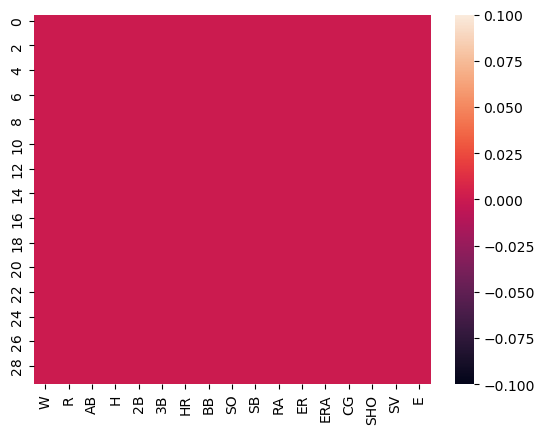

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.nunique().to_frame()

,0
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [12]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here we can see that the count in each column is 30 which indicates that there is no null value. 
In W,R,2B,BB,SO,RA,ER,ERA,SHO median is greater than mean which indicates that these columns might be negatively skewed.
In AB,H3B,HR,SB,CG,SV,E mean is greater that median which indicates that these columns might be positively skewed.
There is not a very huge gap between 75th percentile and max which indicates that there may be few to none outliers in the dataset.


In [13]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

Here we can see that the number of unique values in each column is quite high.The wins column itself has 24 unique values out of 30 which makes it a regression problem 

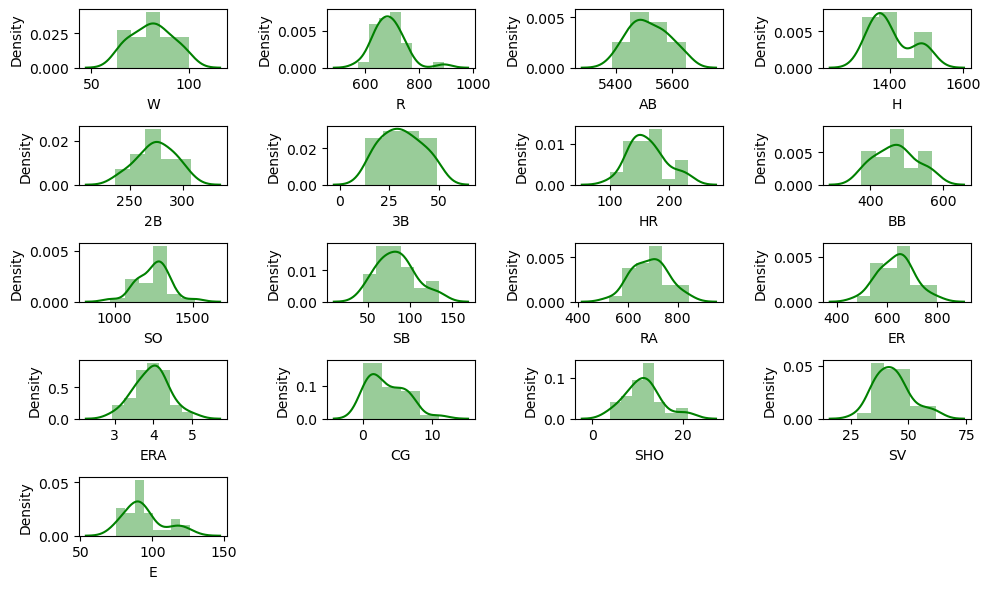

In [14]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above graph shows that distribution of data in various columns. We can see that E,SV,CG,R have positive skewness while SO,SB,RA,BB have negative skewness

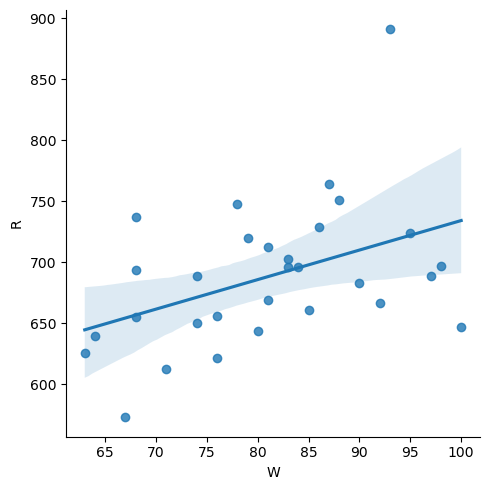

In [15]:
sns.lmplot(x='W',y='R',data=df)

Here we can see that Runs and wins are positively correlated. Higher the runs, more chances of win.

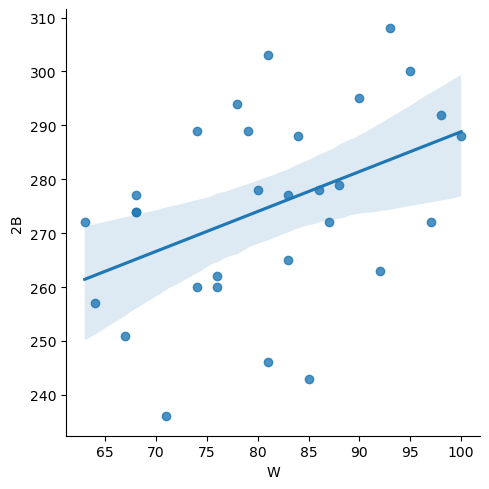

In [16]:
sns.lmplot(x='W',y='2B',data=df)

Here we can see that 2B and W in positively correlated.

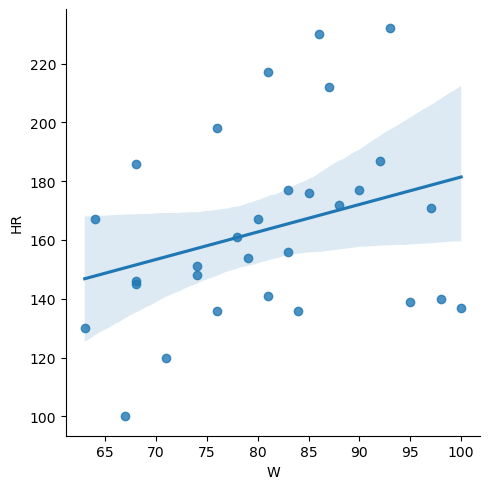

In [17]:
sns.lmplot(x='W',y='HR',data=df)

Here we can see that HR and W are positively correlated

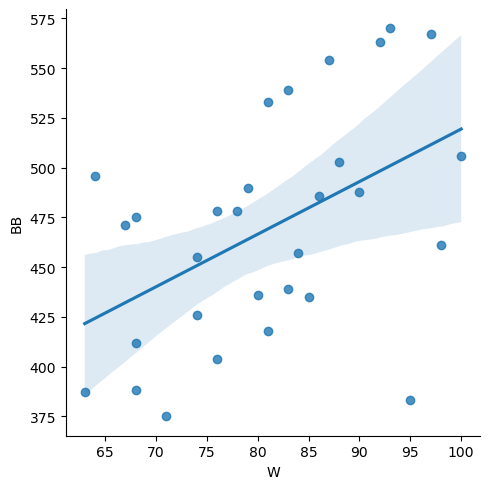

In [18]:
sns.lmplot(x='W',y='BB',data=df)

Again BB is positively correlated to W

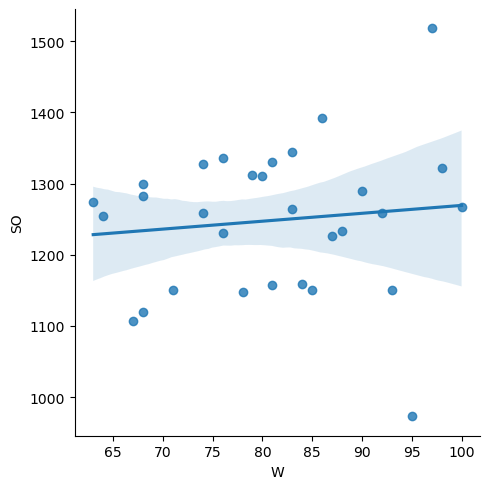

In [19]:
sns.lmplot(x='W',y='SO',data=df)

There is not much correlation between W and SO

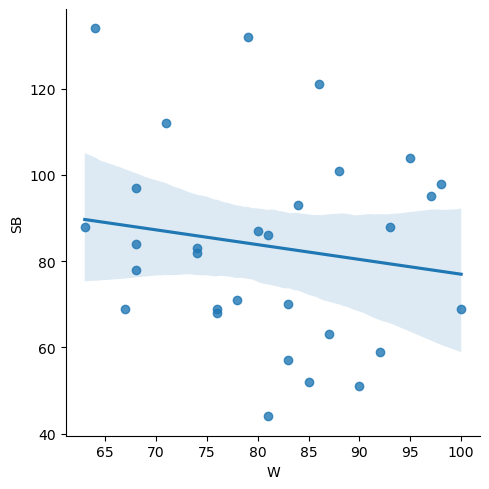

In [20]:
sns.lmplot(x='W',y='SB',data=df)

W and SB are little negatively correlated

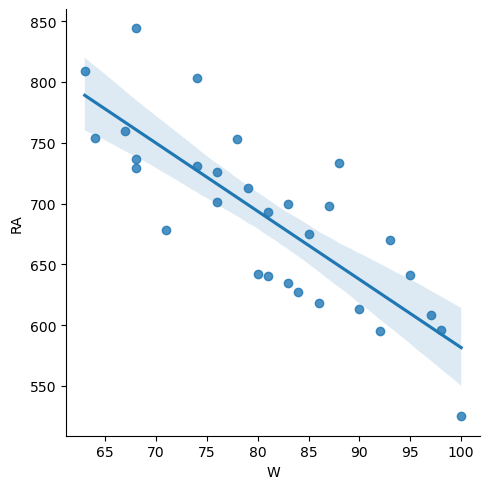

In [21]:
sns.lmplot(x='W',y='RA',data=df)

Here we can see that W and RA and negatively correlated

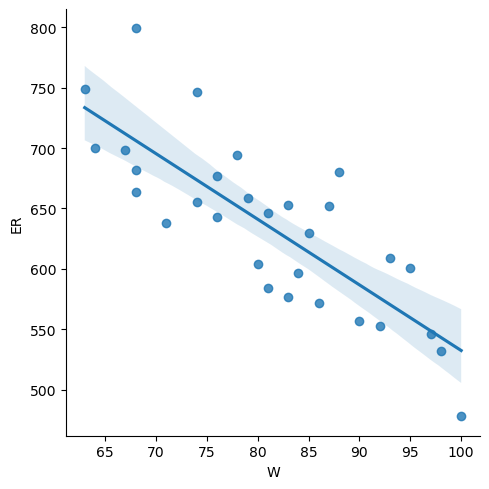

In [22]:
sns.lmplot(x='W',y='ER',data=df)

Again here ER and W are negatively correlated

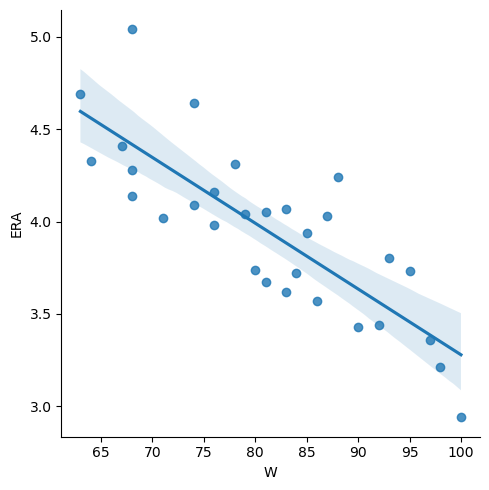

In [23]:
sns.lmplot(x='W',y='ERA',data=df)

Again here ERA and W are negatively correlated

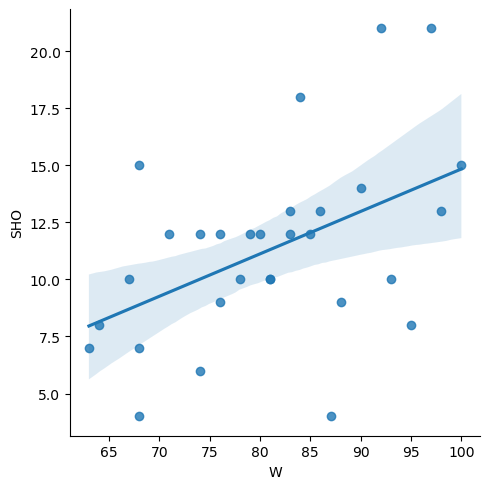

In [24]:
sns.lmplot(x='W',y='SHO',data=df)

SHO and W are positively correlated

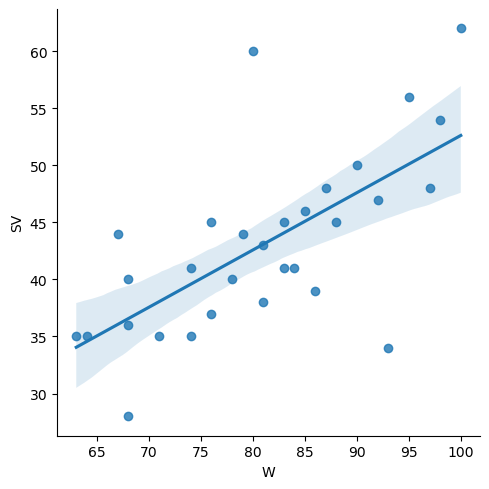

In [25]:
sns.lmplot(x='W',y='SV',data=df)

SV and W are positively correlated

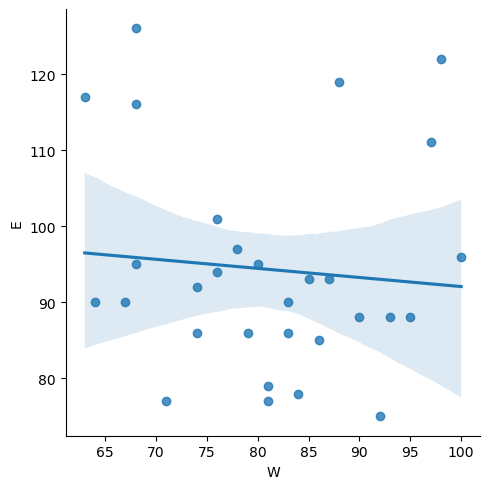

In [26]:
sns.lmplot(x='W',y='E',data=df)

There is negative correlation between E and W

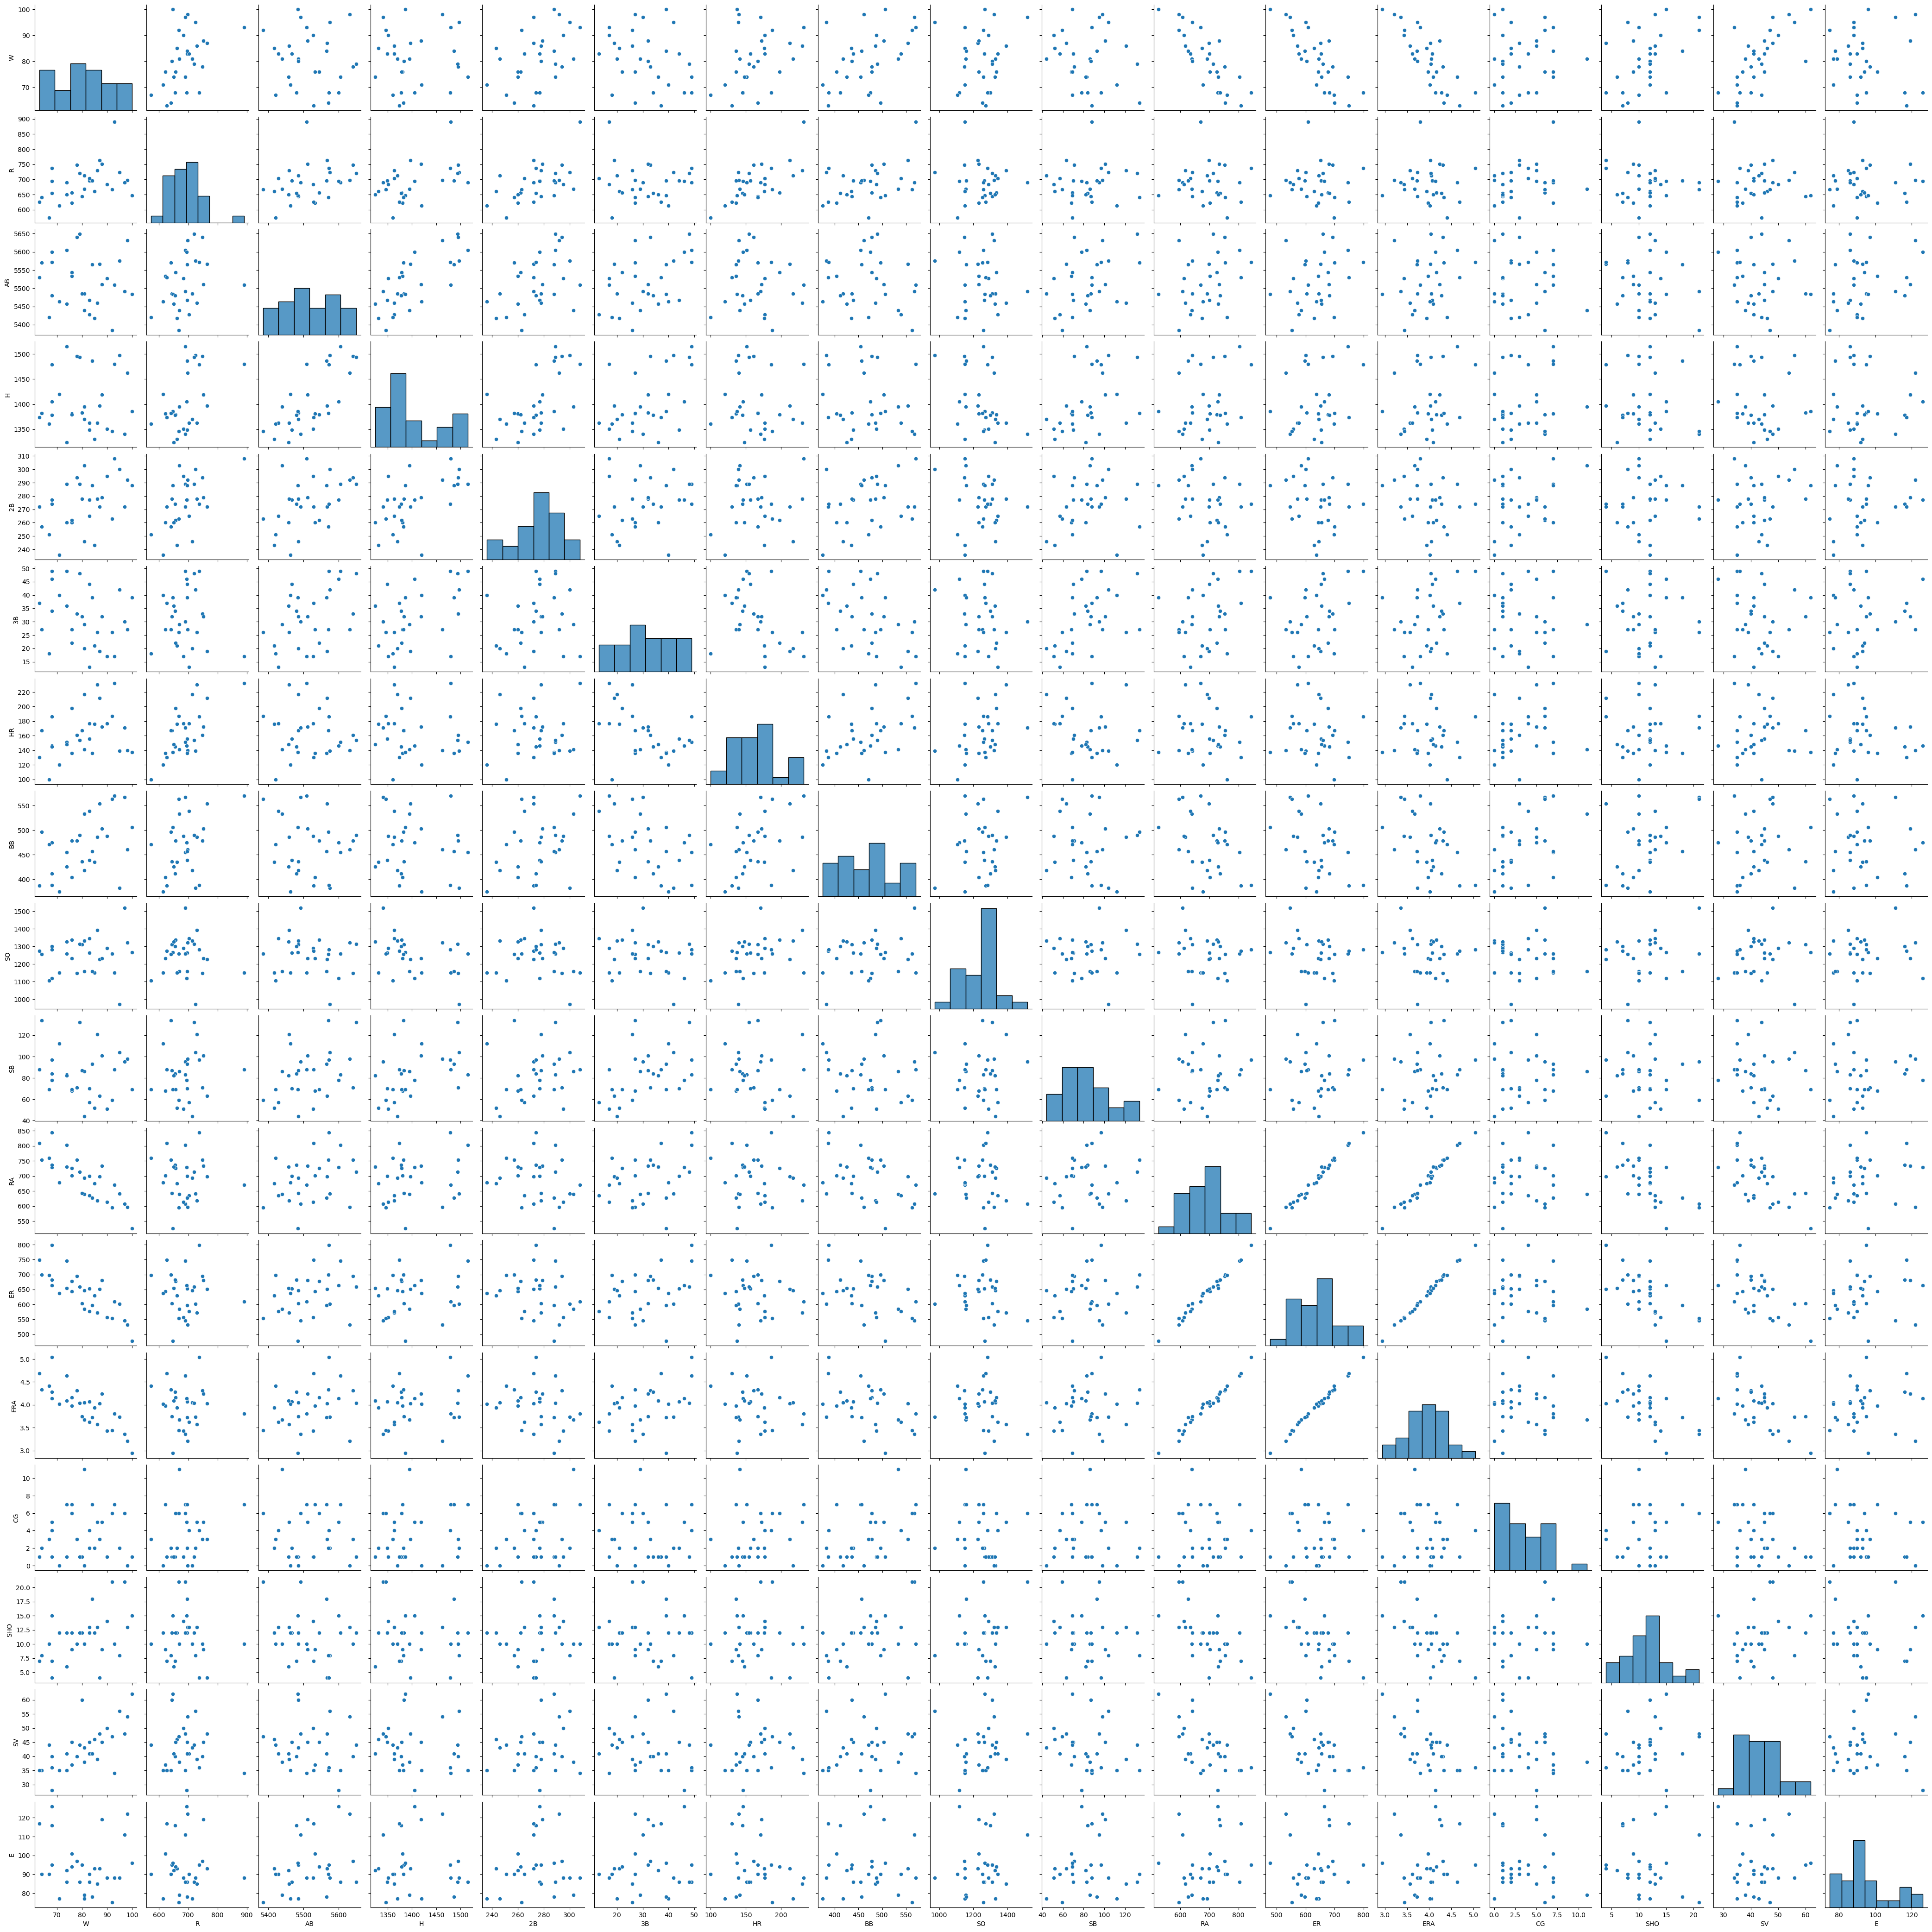

In [27]:
sns.pairplot(data=df)

Here we can see that R and H are positively correlated
H and AB are positively correlated

W         Axes(0.125,0.747241;0.168478x0.132759)
R      Axes(0.327174,0.747241;0.168478x0.132759)
AB     Axes(0.529348,0.747241;0.168478x0.132759)
H      Axes(0.731522,0.747241;0.168478x0.132759)
2B        Axes(0.125,0.587931;0.168478x0.132759)
3B     Axes(0.327174,0.587931;0.168478x0.132759)
HR     Axes(0.529348,0.587931;0.168478x0.132759)
BB     Axes(0.731522,0.587931;0.168478x0.132759)
SO        Axes(0.125,0.428621;0.168478x0.132759)
SB     Axes(0.327174,0.428621;0.168478x0.132759)
RA     Axes(0.529348,0.428621;0.168478x0.132759)
ER     Axes(0.731522,0.428621;0.168478x0.132759)
ERA        Axes(0.125,0.26931;0.168478x0.132759)
CG      Axes(0.327174,0.26931;0.168478x0.132759)
SHO     Axes(0.529348,0.26931;0.168478x0.132759)
SV      Axes(0.731522,0.26931;0.168478x0.132759)
E             Axes(0.125,0.11;0.168478x0.132759)
dtype: object

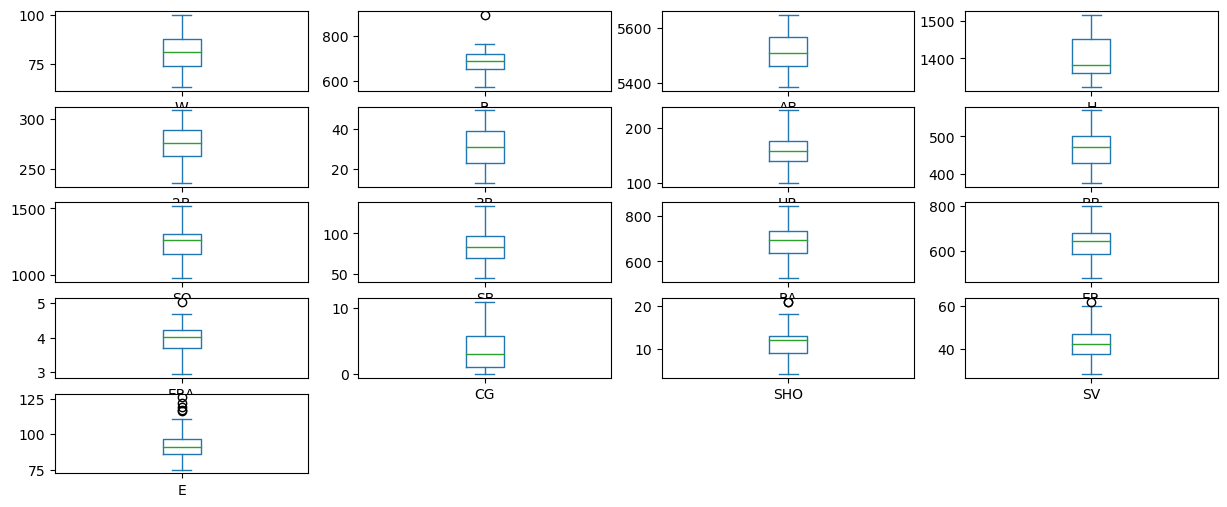

In [28]:
# box plot
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(15,6))

Here we can see that outliers are presend only in E column.

In [174]:
z=np.abs(zscore(df))

In [175]:
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.671559,0.847731,1.648031,1.420173,1.041193,0.775226,1.534902,2.697630,0.913883,0.666234,0.475370,0.475581,0.258616,0.761400,1.613814,0.426682
1,0.197838,0.186357,0.711094,0.982661,0.127403,1.235809,0.186932,0.536592,0.154878,0.601826,0.165971,0.281595,0.288243,0.258616,0.286108,0.309786,0.591477
2,0.003243,0.303312,1.115233,0.132556,1.588795,0.223808,0.703608,1.139144,0.893982,0.111449,0.680339,0.732283,0.615140,1.926666,0.202465,0.635224,1.200011
3,0.483244,1.212667,0.241522,0.388003,0.828122,0.418423,0.883952,1.160536,0.168602,0.690985,0.180076,0.139231,0.090327,1.139845,0.471558,0.779477,0.561092
4,0.677839,0.061536,1.280738,1.948476,0.801892,1.722347,0.355325,0.251360,0.105866,0.022290,1.618803,1.540791,1.478476,1.139845,0.286108,1.075974,0.591477
5,1.170814,3.177940,0.104884,1.360636,1.869832,1.391501,2.018459,1.798742,0.952796,0.200609,0.257184,0.356145,0.314640,1.139845,0.202465,1.228473,0.426682
6,0.587028,1.328448,0.732263,0.096292,0.153633,1.196885,1.491597,1.513510,0.207812,0.913883,0.137760,0.267424,0.200644,0.097622,2.254690,0.684787,0.030525
7,0.003243,0.483565,0.451289,0.590703,1.615025,1.099578,1.626318,0.910958,0.811641,1.760897,0.067235,0.182094,0.244516,2.080983,0.202465,0.050428,1.383794
8,0.094054,0.777478,0.451289,0.351338,0.183611,0.068115,0.171256,0.590073,0.605790,0.156029,0.652129,0.430538,0.452467,0.721077,0.286108,2.045334,0.122012
9,0.288649,1.070552,1.785913,1.614405,1.082929,0.165423,0.022099,0.158660,0.982204,0.557246,0.913544,0.850552,0.802135,0.097622,0.202465,0.354140,0.271376


In [176]:
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [177]:
df1=df[(z<3).all(axis=1)]
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,1.002589,5575,1.940871,300,42,5.180101,383,973,104,641,8.439010,1.550849,16.097364,2.000000,3.825862,1.006161
1,83,1.002580,5467,1.931615,277,44,5.383213,439,1264,70,700,8.675697,1.596607,16.097364,2.289428,3.556893,1.006129
2,81,1.002572,5439,1.934606,303,29,5.204828,533,1157,86,640,8.358678,1.542489,35.400426,2.154435,3.361975,1.006012
3,76,1.002557,5533,1.933707,260,27,5.142563,404,1231,68,701,8.631183,1.584751,28.450269,2.080084,3.332222,1.006351
4,74,1.002578,5605,1.941928,289,49,5.325074,455,1259,83,803,9.069422,1.667910,28.450269,2.289428,3.271066,1.006129
6,87,1.002600,5567,1.934734,272,19,5.962732,554,1227,63,698,8.671266,1.591360,19.244088,1.587401,3.634241,1.006237
7,81,1.002586,5485,1.932994,246,20,6.009245,418,1331,44,693,8.644585,1.593988,0.000000,2.154435,3.503398,1.005976
8,80,1.002564,5485,1.933836,278,32,5.506878,436,1310,87,642,8.453028,1.552234,12.012346,2.289428,3.914868,1.006266
9,78,1.002596,5640,1.940752,294,33,5.440122,478,1148,71,753,8.853599,1.627393,19.244088,2.154435,3.419952,1.006295
10,88,1.002596,5511,1.936124,279,32,5.561298,503,1233,101,733,8.793659,1.618534,24.288200,2.080084,3.556893,1.006577


In [178]:
print("Data_Loss= ",((df.shape[0]-df1.shape[0])/df.shape[0]))

Data_Loss=  0.03333333333333333


We can see that the data loss is very small

In [183]:
#Now we will check for skewness df
df1.skew()

W      0.119013
R     -0.416306
AB     0.169573
H      0.734182
2B    -0.335304
3B     0.090124
HR     0.093886
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER    -0.201289
ERA   -0.226238
CG    -0.423865
SHO   -0.298136
SV     0.280963
E      0.583677
dtype: float64

In [190]:
df1['H']=np.sqrt(df1['H'])

In [191]:
df1['E']=np.cbrt(df1['E'])

In [192]:
df1.skew()

W      0.119013
R     -0.416306
AB     0.169573
H      0.732176
2B    -0.335304
3B     0.090124
HR     0.093886
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER    -0.201289
ERA   -0.226238
CG    -0.423865
SHO   -0.298136
SV     0.280963
E      0.000000
dtype: float64

In [193]:
#correlation in df
df1cor=df1.corr()
df1cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.401249,-0.085780,-0.021122,0.384886,-0.206737,0.258509,0.447513,0.156469,-0.169503,-0.823176,-0.820281,-0.832365,-0.009485,0.468575,0.755967,-0.075036
R,0.401249,1.000000,0.436350,0.425257,0.479004,0.142502,0.615458,0.259613,0.097563,0.073107,-0.031353,-0.009876,-0.026857,0.137540,-0.110571,0.076760,0.039645
AB,-0.085780,0.436350,1.000000,0.770273,0.490752,0.445604,-0.039948,-0.137850,-0.111243,0.373674,0.315499,0.302280,0.246842,-0.065664,-0.192559,-0.132717,0.321901
H,-0.021122,0.425257,0.770273,1.000000,0.527255,0.579405,-0.204551,-0.221696,-0.373488,0.420503,0.243505,0.269955,0.244988,0.043095,-0.127077,-0.094134,-0.012220
2B,0.384886,0.479004,0.490752,0.527255,1.000000,0.342419,-0.067157,0.211243,-0.096772,0.194308,-0.215196,-0.237115,-0.260659,0.267794,0.088807,0.254589,0.147010
3B,-0.206737,0.142502,0.445604,0.579405,0.342419,1.000000,-0.340578,-0.404852,-0.196586,0.483818,0.312750,0.318585,0.310031,0.016112,-0.070633,-0.244604,0.098432
HR,0.258509,0.615458,-0.039948,-0.204551,-0.067157,-0.340578,1.000000,0.342854,0.488455,-0.162327,-0.095249,-0.062273,-0.071502,0.108038,-0.034772,0.095185,-0.161379
BB,0.447513,0.259613,-0.137850,-0.221696,0.211243,-0.404852,0.342854,1.000000,0.315566,-0.117622,-0.425381,-0.455860,-0.463909,0.446437,0.419117,0.200162,-0.052399
SO,0.156469,0.097563,-0.111243,-0.373488,-0.096772,-0.196586,0.488455,0.315566,1.000000,0.038188,-0.140570,-0.188024,-0.206289,-0.066656,0.188445,0.110550,0.152677
SB,-0.169503,0.073107,0.373674,0.420503,0.194308,0.483818,-0.162327,-0.117622,0.038188,1.000000,0.134315,0.144506,0.126924,-0.037673,-0.095712,-0.189903,0.077966


<Axes: >

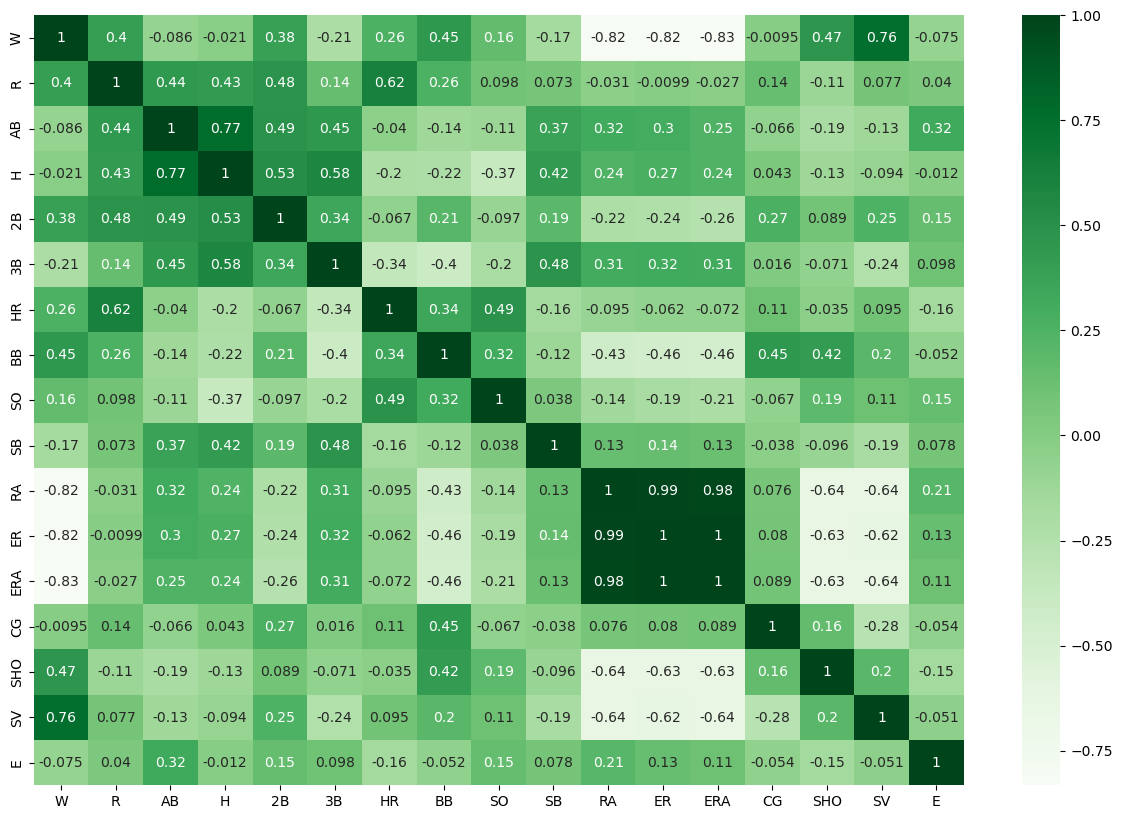

In [194]:
#heatmap of dfcor
plt.figure(figsize=(15,10))
sns.heatmap(df1cor,cmap='Greens',annot=True)

Above we can clearly see the correlations.
1.)ER and ERA are positively correlated to eachother.
2.)SV,BB,SHO is positively correlated to W
3.) BB is positively correlated to CG,SHO.
4.)SB is positively correlated to 3B
5.) HR is positively correlated tp R.
6.)H ad AB are postively correlated.
7.) SHO and W is negatively correlated with RA,ER,ERA


In [195]:
df1cor['W'].sort_values(ascending=False)

W      1.000000
SV     0.755967
SHO    0.468575
BB     0.447513
R      0.401249
2B     0.384886
HR     0.258509
SO     0.156469
CG    -0.009485
H     -0.021122
E     -0.075036
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.820281
RA    -0.823176
ERA   -0.832365
Name: W, dtype: float64

Here we can observe the positive and negative correlation with target variable charges that we saw in heatmap above.

In [196]:
#Now separating dependent and independent variables
x=df1.drop('W',axis=1)
y=df1['W']

In [197]:
x.shape

(29, 16)

In [198]:
#now we will scale x
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.951326,0.830084,1.721694,1.556538,1.010845,-0.748317,-1.536359,-2.727623,0.905953,-0.664514,-0.480507,-0.479073,-0.220623,-0.756001,1.586882,-0.435292
1,0.360415,-0.702831,-0.951344,0.201171,1.208917,-0.124429,-0.495021,0.121896,-0.585315,0.154638,0.265369,0.273197,-0.220623,0.274630,0.270050,-0.597852
2,-0.235934,-1.100253,-0.086234,1.733325,-0.276617,-0.672366,1.252941,-0.925866,0.116458,-0.678397,-0.733656,-0.616522,1.977737,-0.206072,-0.684238,-1.198176
3,-1.343404,0.233951,-0.346057,-0.800621,-0.474688,-0.863622,-1.145857,-0.201246,-0.673037,0.168522,0.125090,0.078275,1.186207,-0.470829,-0.829907,0.538984
4,0.208400,1.255894,2.026209,0.908319,1.704094,-0.303011,-0.197495,0.072935,-0.015124,1.584683,1.506116,1.445428,1.186207,0.274630,-1.129315,-0.597852
5,1.751326,0.716535,-0.049358,-0.093474,-1.266972,1.655659,1.643442,-0.240414,-0.892341,0.126870,0.251406,0.186924,0.137746,-2.225231,0.648734,-0.044527
6,0.722375,-0.447345,-0.552311,-1.625627,-1.167936,1.798531,-0.885522,0.777970,-1.725697,0.057451,0.167326,0.230132,-2.053898,-0.206072,0.008146,-1.379493
7,-0.813404,-0.447345,-0.308757,0.260100,0.020490,0.255431,-0.550807,0.572335,0.160319,-0.650630,-0.436331,-0.456308,-0.685852,0.274630,2.022638,0.105926
8,1.437245,1.752672,1.687603,1.202964,0.119526,0.050377,0.230197,-1.013995,-0.541454,0.890486,0.825990,0.779317,0.137746,-0.206072,-0.400394,0.253245
9,1.496720,-0.078310,0.352361,0.319029,0.020490,0.422589,0.695081,-0.181661,0.774370,0.612808,0.637103,0.633682,0.712203,-0.470829,0.270050,1.698667


In [199]:
#Checking VIF for x
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,R,7.264555
1,AB,18.318850
2,H,8.521710
3,2B,3.891290
4,3B,2.874416
5,HR,7.630042
6,BB,3.596180
7,SO,3.030014
8,SB,2.084326
9,RA,159.856234


Here we can see that ER and ERA have very high VIF value. Hence we will remove ER.

In [200]:
x.drop("ER",axis=1,inplace=True)

In [201]:
#Again Checking VIF for x
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,R,6.828581
1,AB,6.386293
2,H,7.565217
3,2B,3.597357
4,3B,2.872820
5,HR,7.113224
6,BB,3.594607
7,SO,3.029921
8,SB,1.896080
9,RA,132.979580


Now the VIF has significantly reduced But still we can reduce it by dropiing RA

In [202]:
x.drop("RA",axis=1,inplace=True)

In [203]:
#Checking VIF for x
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF Values
0,R,6.638445
1,AB,4.783414
2,H,7.320922
3,2B,3.498211
4,3B,2.856882
5,HR,6.663287
6,BB,3.033983
7,SO,2.232733
8,SB,1.708127
9,ERA,4.760092


Now we can see that out VIF value is well within range

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [205]:
#Now we find the best random state with x and y
maxRS=0
maxaccu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Maximum r2 score is ",maxaccu, "at random state ",maxRS)

Maximum r2 score is  0.9824558202357929 at random state  47


In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [207]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_Score : ",r2_score(y_test,pred_LR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_LR)) )

LinearRegression()
R2_Score :  0.9824558202357929
R2_Score on Training Data : 0.9253108821229687
Mean Absolute Error: 1.341108452264083
Mean Squared Error: 2.2144653569043538
Root Mean Squared Error: 1.4881079789129394


In [208]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_Score : ",r2_score(y_test,pred_RFR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)) )


RandomForestRegressor()
R2_Score :  0.7285495158450702
R2_Score on Training Data : 0.9277523452592535
Mean Absolute Error: 5.038333333333337
Mean Squared Error: 34.26308333333336
Root Mean Squared Error: 5.853467633235308


In [209]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred_KNR=KNR.predict(x_test)
pred_train=KNR.predict(x_train)
print(KNR)
print("R2_Score : ",r2_score(y_test,pred_KNR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_KNR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_KNR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_KNR)) )


KNeighborsRegressor()
R2_Score :  0.5483098591549294
R2_Score on Training Data : 0.6408793756278494
Mean Absolute Error: 6.333333333333333
Mean Squared Error: 57.01333333333336
Root Mean Squared Error: 7.550717405209478


In [210]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_Score : ",r2_score(y_test,pred_GBR))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_GBR)) )

GradientBoostingRegressor()
R2_Score :  0.7739043890447074
R2_Score on Training Data : 0.9999999230479427
Mean Absolute Error: 4.635664979369122
Mean Squared Error: 28.538290449468047
Root Mean Squared Error: 5.342124151446505


In [211]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print("R2_Score : ",r2_score(y_test,pred_svr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_svr)) )

SVR()
R2_Score :  0.08743764882218319
R2_Score on Training Data : 0.21145048208806794
Mean Absolute Error: 8.98944834433742
Mean Squared Error: 115.185647882
Root Mean Squared Error: 10.732457681351462


In [212]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_Score : ",r2_score(y_test,pred_lasso))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_lasso)) )


Lasso()
R2_Score :  0.9208364291806961
R2_Score on Training Data : 0.8696237594533022
Mean Absolute Error: 2.5026290635871384
Mean Squared Error: 9.992201827858807
Root Mean Squared Error: 3.1610444204184804


In [213]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print(ridge)
print("R2_Score : ",r2_score(y_test,pred_ridge))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ridge)) )


Ridge()
R2_Score :  0.9501923077658587
R2_Score on Training Data : 0.9181073155845502
Mean Absolute Error: 2.245776703656221
Mean Squared Error: 6.286837597553827
Root Mean Squared Error: 2.5073566953175663


In [214]:
EN=ElasticNet()
EN.fit(x_train,y_train)
pred_EN=EN.predict(x_test)
pred_train=EN.predict(x_train)
print(EN)
print("R2_Score : ",r2_score(y_test,pred_EN))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_EN))
print("Mean Squared Error:", mean_squared_error(y_test,pred_EN))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_EN)) )


ElasticNet()
R2_Score :  0.8198192244857213
R2_Score on Training Data : 0.8199501282263225
Mean Absolute Error: 3.7543449574154812
Mean Squared Error: 22.742817887135626
Root Mean Squared Error: 4.768943057652883


In [215]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_Score : ",r2_score(y_test,pred_dtr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_dtr)) )


DecisionTreeRegressor()
R2_Score :  0.6038732394366197
R2_Score on Training Data : 1.0
Mean Absolute Error: 6.333333333333333
Mean Squared Error: 50.0
Root Mean Squared Error: 7.0710678118654755


In [216]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
pred_train=ad.predict(x_train)
print(ad)
print("R2_Score : ",r2_score(y_test,pred_ad))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_ad))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ad))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ad)))

AdaBoostRegressor()
R2_Score :  0.7183930778067957
R2_Score on Training Data : 0.9868597276957817
Mean Absolute Error: 5.71013431013431
Mean Squared Error: 35.545051512386685
Root Mean Squared Error: 5.961967084141499


In [217]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
pred_train=br.predict(x_train)
print(br)
print("R2_Score : ",r2_score(y_test,pred_br))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_br))
print("Mean Squared Error:", mean_squared_error(y_test,pred_br))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_br)))

BaggingRegressor()
R2_Score :  0.7472843309859155
R2_Score on Training Data : 0.8777752878448342
Mean Absolute Error: 5.05
Mean Squared Error: 31.89833333333333
Root Mean Squared Error: 5.647860952018324


In [218]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print("R2_Score : ",r2_score(y_test,pred_etr))
print("R2_Score on Training Data :", r2_score(y_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error:", mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_Score :  0.7015748679577467
R2_Score on Training Data : 1.0
Mean Absolute Error: 4.964999999999999
Mean Squared Error: 37.667883333333315
Root Mean Squared Error: 6.137416666100918


In [219]:
R2_Score=pd.DataFrame([['etr',r2_score(y_test,pred_etr)],['LR',r2_score(y_test,pred_LR)],['BR',r2_score(y_test,pred_br)],['ADR',r2_score(y_test,pred_ad)],['SVR',r2_score(y_test,pred_svr)],['DTR',r2_score(y_test,pred_dtr)],['EN',r2_score(y_test,pred_EN)],['Ridge',r2_score(y_test,pred_ridge)],['Lasso',r2_score(y_test,pred_lasso)],['GBR',r2_score(y_test,pred_GBR)],['KNR',r2_score(y_test,pred_KNR)],['RFR',r2_score(y_test,pred_RFR)]],columns=['Model','R2_Score'])
R2_Score

,Model,R2_Score
0,etr,0.701575
1,LR,0.982456
2,BR,0.747284
3,ADR,0.718393
4,SVR,0.087438
5,DTR,0.603873
6,EN,0.819819
7,Ridge,0.950192
8,Lasso,0.920836
9,GBR,0.773904


Here we can see Linear regression is our best model so far. We can validate the same with CVscore

In [220]:
#Now we will check with Cross Validation Score
from sklearn.model_selection import cross_val_score
#default cv=5
cvs=cross_val_score
score_LR=cvs(LR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_LR))
print(score_LR)
print(score_LR.mean())
print("Difference between r2 score and Cross Val Score for Linear regression is :", (r2_score(y_test,pred_LR)-score_LR.mean())*100)

0.9824558202357929
[ 0.54333935 -0.61800656  0.67949108  0.66692737  0.64259495]
0.38286923889448177
Difference between r2 score and Cross Val Score for Linear regression is : 59.95865813413111


In [221]:
score_RFR=cvs(RFR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_RFR))
print(score_RFR)
print(score_RFR.mean())
print("Difference between r2 score and Cross Val Score for RandomForestRegressor is :", (r2_score(y_test,pred_RFR)-score_RFR.mean())*100)

0.7285495158450702
[ 0.18810523 -5.13651711  0.44779682  0.4017518   0.79700973]
-0.6603707049049046
Difference between r2 score and Cross Val Score for RandomForestRegressor is : 138.8920220749975


In [222]:
score_KNR=cvs(KNR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_KNR))
print(score_KNR)
print(score_KNR.mean())
print("Difference between r2 score and Cross Val Score for KNeighborsRegressor is :", (r2_score(y_test,pred_KNR)-score_KNR.mean())*100)

0.5483098591549294
[ 0.03877273 -2.05894737  0.4126307   0.27055738  0.65330189]
-0.13673693577083199
Difference between r2 score and Cross Val Score for KNeighborsRegressor is : 68.50467949257613


In [223]:
score_GBR=cvs(GBR,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_GBR))
print(score_GBR)
print(score_GBR.mean())
print("Difference between r2 score and Cross Val Score for GradientBoostingRegressor is :", (r2_score(y_test,pred_GBR)-score_GBR.mean())*100)

0.7739043890447074
[ 0.04864956 -8.42331101  0.45268666  0.45168254  0.75489966]
-1.3430785183203267
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 211.6982907365034


In [224]:
score_svr=cvs(svr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_svr))
print(score_svr)
print(score_svr.mean())
print("Difference between r2 score and Cross Val Score for SVR is :", (r2_score(y_test,pred_svr)-score_svr.mean())*100)

0.08743764882218319
[-0.10617503 -1.18372903 -0.02096764 -0.46339443  0.16218862]
-0.3224155029212687
Difference between r2 score and Cross Val Score for SVR is : 40.98531517434519


In [225]:
score_lasso=cvs(lasso,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_lasso))
print(score_lasso)
print(score_lasso.mean())
print("Difference between r2 score and Cross Val Score for Lasso is :", (r2_score(y_test,pred_lasso)-score_lasso.mean())*100)

0.9208364291806961
[ 0.73881002 -0.75434811  0.80162163  0.78855081  0.87497402]
0.4899216735728773
Difference between r2 score and Cross Val Score for Lasso is : 43.09147556078188


In [226]:
score_ridge=cvs(ridge,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_ridge))
print(score_ridge)
print(score_ridge.mean())
print("Difference between r2 score and Cross Val Score for Ridge is :", (r2_score(y_test,pred_ridge)-score_ridge.mean())*100)

0.9501923077658587
[ 0.56816897 -0.84202396  0.68835472  0.89041471  0.84085653]
0.42915419118094267
Difference between r2 score and Cross Val Score for Ridge is : 52.10381165849161


In [227]:
score_EN=cvs(EN,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_EN))
print(score_EN)
print(score_EN.mean())
print("Difference between r2 score and Cross Val Score for ElasticNet is :", (r2_score(y_test,pred_EN)-score_EN.mean())*100)

0.8198192244857213
[ 0.45580564 -0.83613031  0.59908397  0.55884988  0.8551148 ]
0.326544795853988
Difference between r2 score and Cross Val Score for ElasticNet is : 49.32744286317333


In [228]:
score_dtr=cvs(dtr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_dtr))
print(score_dtr)
print(score_dtr.mean())
print("Difference between r2 score and Cross Val Score for DecisionTreeRegressor is :", (r2_score(y_test,pred_dtr)-score_dtr.mean())*100)

0.6038732394366197
[ -2.39545455 -11.34210526  -0.09075701   0.45901639  -0.29127358]
-2.7321148011025067
Difference between r2 score and Cross Val Score for DecisionTreeRegressor is : 333.5988040539126


In [229]:
score_ad=cvs(ad,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_ad))
print(score_ad)
print(score_ad.mean())
print("Difference between r2 score and Cross Val Score for AdaBoostRegressor is :", (r2_score(y_test,pred_ad)-score_ad.mean())*100)

0.7183930778067957
[ 0.31530914 -6.17105263  0.46352061  0.42809369  0.87160885]
-0.81850406812492
Difference between r2 score and Cross Val Score for AdaBoostRegressor is : 153.68971459317157


In [230]:
score_br=cvs(br,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_br))
print(score_br)
print(score_br.mean())
print("Difference between r2 score and Cross Val Score for BaggingRegressor is :", (r2_score(y_test,pred_br)-score_br.mean())*100)

0.7472843309859155
[ 0.35060227 -3.83013158  0.36731075  0.31454098  0.61314858]
-0.4369057978134279
Difference between r2 score and Cross Val Score for BaggingRegressor is : 118.41901287993434


In [173]:
score_etr=cvs(etr,x,y,cv=5,scoring='r2')
print(r2_score(y_test,pred_etr))
print(score_etr)
print(score_etr.mean())
print("Difference between r2 score and Cross Val Score for ExtraTreesRegressor is :", (r2_score(y_test,pred_etr)-score_etr.mean())*100)

0.5047807038834952
[-0.05176989 -3.00358931  0.30145171  0.29482122  0.74422728]
-0.34297179803519096
Difference between r2 score and Cross Val Score for ExtraTreesRegressor is : 84.77525019186861


Above we can see that though the r2 score of Linear Regression is highest(98%) but the difference between re score and  CV Score is very high(59.95)and CV score is low 0.38 where as in Lasso the r2 score is 92% but the difference between cv score and r2 score is comparitively less(43.09) and cv score is also better as compared to LR(.4899)
Hence we conclude that Lasso is our best model

HYPERPARAMETER TUNING

In [231]:
from sklearn.model_selection import GridSearchCV

In [259]:
params={'alpha':[0.0001,0.001,0.01,0.1], 
              'fit_intercept': [True,False], 
              'copy_X': [True , False], 
              'tol':[0.0001,0.001,0.01,0.1]}

In [260]:
GCV=GridSearchCV(lasso,params,cv=5)

In [261]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [262]:
GCV.best_params_

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'tol': 0.1}

In [267]:
Final_model1=Lasso(alpha=.1,copy_X= True,fit_intercept= True,tol= .1)
Final_model1.fit(x_train,y_train)
finalpred1=Final_model1.predict(x_test)
print("R2_Score : ",r2_score(y_test,finalpred1))
print("Mean Absolute Error:", mean_absolute_error(y_test,finalpred1))
print("Mean Squared Error:", mean_squared_error(y_test,finalpred1))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,finalpred1)))

R2_Score :  0.9350706375845513
Mean Absolute Error: 2.1452425097289876
Mean Squared Error: 8.195528411549967
Root Mean Squared Error: 2.862783332973344


In [268]:
Final_model=Lasso(alpha=.01,copy_X= True,fit_intercept= True,tol= .0001)
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
print("R2_Score : ",r2_score(y_test,finalpred))
print("Mean Absolute Error:", mean_absolute_error(y_test,finalpred))
print("Mean Squared Error:", mean_squared_error(y_test,finalpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,finalpred)))

R2_Score :  0.9905322817940426
Mean Absolute Error: 0.8936387558309326
Mean Squared Error: 1.1950364313297335
Root Mean Squared Error: 1.0931772186291357


As we can see it is giving best params as alpha=.1 and tol=0.1 but with that i am getting r2 score of 93.50% but if i change the alpha=0.01 and tol=0.0001 i am getting r2 score of 99.05%.
Since i am getting better score i will choose Final_model

SAVING BEST MODEL

In [269]:
import joblib
import pickle
filename='Baseball Case Study.pkl'
pickle.dump(Final_model,open(filename,'wb'))
loaded_model=pickle.load(open('Baseball Case Study.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)


99.05322817940426


In [270]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [271]:
conclusion

,0,1,2,3,4,5
Predicted,100.658725,73.819202,74.685202,84.898148,76.252429,63.517173
Original,100.000000,76.000000,74.000000,86.000000,76.000000,64.000000


Above we can see that the predicted values are very close or same as original values

In [ ]:
#FINISH